In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing, model_selection, metrics
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor
%matplotlib inline

try:
    # To enable interactive mode you should install ipywidgets
    # https://github.com/jupyter-widgets/ipywidgets
    from ipywidgets import interact, SelectMultiple

    INTERACTIVE = True
except ImportError:
    INTERACTIVE = False
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv("Data/train.csv")
test_df = pd.read_csv("Data/test.csv")

In [3]:
train_df.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4993 entries, ID to 9fc776466
dtypes: float64(1845), int64(3147), object(1)
memory usage: 169.9+ MB


In [5]:
train_df.shape, test_df.shape

((4459, 4993), (49342, 4992))

In [6]:
train_df.describe()

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
count,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,...,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.000000,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03
mean,5.944923e+06,1.465493e+04,1.390895e+03,2.672245e+04,4.530164e+03,2.640996e+04,3.070811e+04,1.686522e+04,4.669208e+03,2.569407e+06,...,4.676057e+05,4.446239e+05,8.056219e+05,7.812966e+05,143.529939,1.213809e+05,3.573451e+04,3.123741e+05,9.219960e+04,2.279100e+05
std,8.234312e+06,3.893298e+05,6.428302e+04,5.699652e+05,2.359124e+05,1.514730e+06,5.770590e+05,7.512756e+05,1.879449e+05,9.610183e+06,...,4.068038e+06,4.428889e+06,4.513246e+06,6.839451e+06,9584.318507,4.720709e+06,1.614622e+06,4.318501e+06,1.635993e+06,1.811139e+06
min,3.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.260000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+07,2.000000e+07,4.000000e+06,2.000000e+07,1.480000e+07,1.000000e+08,2.070800e+07,4.000000e+07,1.040000e+07,3.196120e+08,...,7.600000e+07,1.235880e+08,1.300000e+08,1.444000e+08,640000.000000,3.013120e+08,1.064200e+08,1.400000e+08,6.176800e+07,4.320000e+07


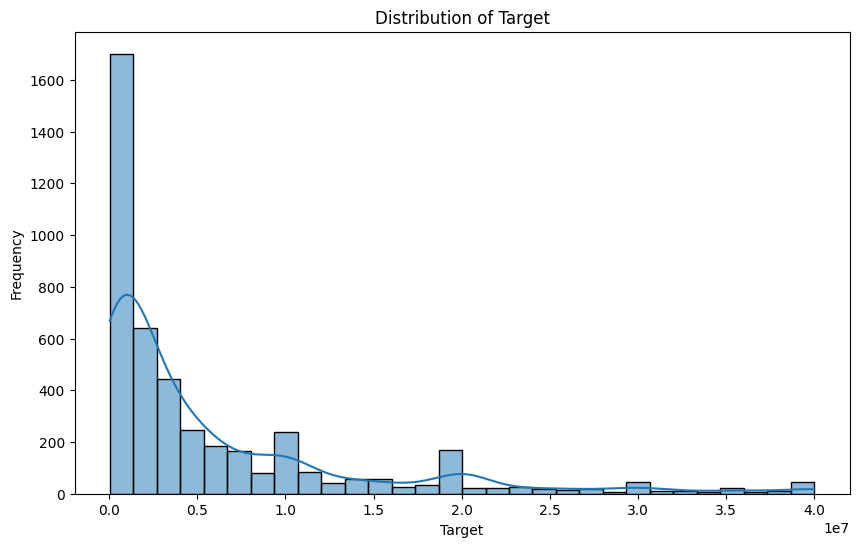

In [7]:
# Distribution of Taget variable
plt.figure(figsize=(10, 6))
sns.histplot(train_df['target'], kde=True, bins=30)
plt.title('Distribution of Target')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

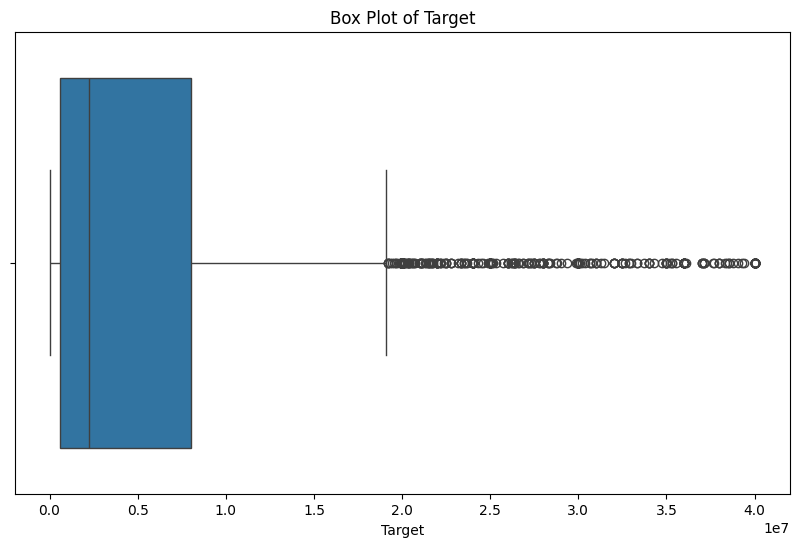

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['target'])
plt.title('Box Plot of Target')
plt.xlabel('Target')
plt.show()

In [9]:
quartiles = pd.qcut(train_df['target'], q=4)
# Counting the number of observations in each quartile
quartile_counts = quartiles.value_counts().sort_index()
print(quartile_counts)

target
(29999.999, 600000.0]      1176
(600000.0, 2260000.0]      1054
(2260000.0, 8000000.0]     1149
(8000000.0, 40000000.0]    1080
Name: count, dtype: int64


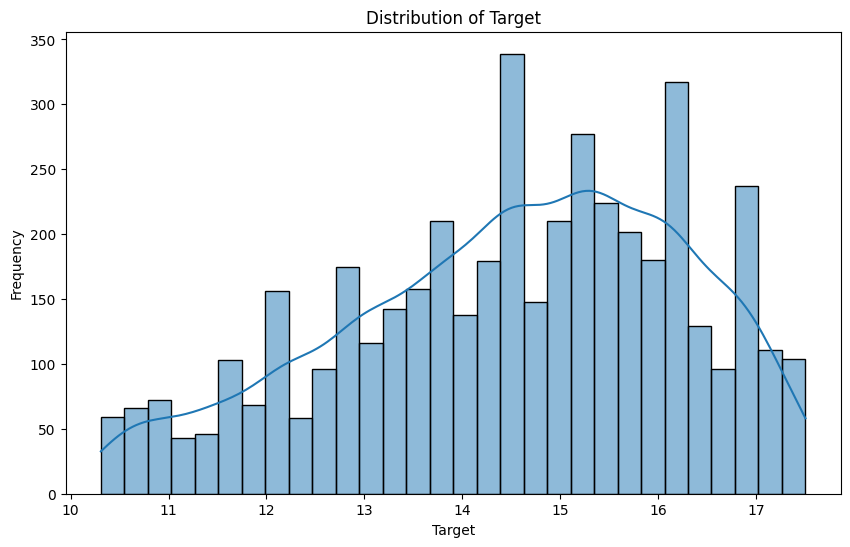

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log(train_df['target']), kde=True, bins=30)
plt.title('Distribution of Target')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

In [11]:
null_values = train_df.isnull().sum()
null_columns = null_values[null_values > 0]
null_columns

Series([], dtype: int64)

In [12]:
null_values = test_df.isnull().sum()
null_columns = null_values[null_values > 0]
null_columns

Series([], dtype: int64)

In [13]:
std_dev = train_df.iloc[:,1:].std()

# Identify columns with a standard deviation of 0 (excluding 'target')
columns_to_drop = std_dev[std_dev == 0].index.tolist()

# Drop the identified columns from train_df
train_df = train_df.drop(columns=columns_to_drop)

print(f"Columns dropped: {columns_to_drop}")

Columns dropped: ['d5308d8bc', 'c330f1a67', 'eeac16933', '7df8788e8', '5b91580ee', '6f29fbbc7', '46dafc868', 'ae41a98b6', 'f416800e9', '6d07828ca', '7ac332a1d', '70ee7950a', '833b35a7c', '2f9969eab', '8b1372217', '68322788b', '2288ac1a6', 'dc7f76962', '467044c26', '39ebfbfd9', '9a5ff8c23', 'f6fac27c8', '664e2800e', 'ae28689a2', 'd87dcac58', '4065efbb6', 'f944d9d43', 'c2c4491d5', 'a4346e2e2', '1af366d4f', 'cfff5b7c8', 'da215e99e', '5acd26139', '9be9c6cef', '1210d0271', '21b0a54cb', 'da35e792b', '754c502dd', '0b346adbd', '0f196b049', 'b603ed95d', '2a50e001c', '1e81432e7', '10350ea43', '3c7c7e24c', '7585fce2a', '64d036163', 'f25d9935c', 'd98484125', '95c85e227', '9a5273600', '746cdb817', '6377a6293', '7d944fb0c', '87eb21c50', '5ea313a8c', '0987a65a1', '2fb7c2443', 'f5dde409b', '1ae50d4c3', '2b21cd7d8', '0db8a9272', '804d8b55b', '76f135fa6', '7d7182143', 'f88e61ae6', '378ed28e0', 'ca4ba131e', '1352ddae5', '2b601ad67', '6e42ff7c7', '22196a84c', '0e410eb3d', '992e6d1d3', '90a742107', '08b9ec

In [14]:
test_df = test_df.drop(columns=columns_to_drop)

In [15]:
len(columns_to_drop)

256

In [16]:
duplicate_columns = train_df.T.duplicated()
duplicate_column_names = train_df.columns[duplicate_columns]
duplicate_column_names

Index(['d60ddde1b', '912836770', 'acc5b709d', 'f8d75792f', 'f333a5f60'], dtype='object')

In [17]:
train_df = train_df.loc[:, ~train_df.columns.duplicated()]

In [18]:
test_df = test_df.loc[:, ~test_df.columns.duplicated()]

In [19]:
test_df.head()

,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000137c73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00021489f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0004d7953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00056a333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00056d8eb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
train_df.shape,test_df.shape

((4459, 4737), (49342, 4736))

In [21]:
unique_counts = train_df.iloc[:, 2:].nunique()

# Identify columns with less than 2 unique values
cols_to_drop = unique_counts[unique_counts < 2].index

# Drop columns with less than 2 unique values, except for the first and second columns
train_df = train_df.drop(columns=cols_to_drop)
test_df = test_df.drop(columns=cols_to_drop)

In [22]:
train_df.shape,test_df.shape

((4459, 4737), (49342, 4736))

In [23]:
X_train = train_df.drop(['ID', 'target'], axis=1)

y_train = np.log(train_df['target'].values)

X_test_original = test_df.drop('ID', axis=1)

X_train_split, X_test, y_train_split, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [82]:
X_train_split.shape, X_test.shape, y_train_split.shape, y_test.shape

((3567, 4735), (892, 4735), (3567,), (892,))

### Custom Evaluation Metric

In [83]:
def rmsle(y_pred, data):
    y = data.get_label()
    y_pred[y_pred < -1] = -1 + 1e-6
    elements = np.power(np.log1p(y) - np.log1p(y_pred), 2)
    return 'RMSLE', float(np.sqrt(np.sum(elements) / len(y))), False

### Training LightGBM

In [84]:
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train_split, y_train_split)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
evals_result = {}
# specify your configurations as a dict
params = {
    "objective" : "regression",
    "metric": "custom",
    "num_leaves": 100,
    "learning_rate": 0.001,
    "feature_fraction": 0.6,
    "bagging_fraction": 0.6,
    "bagging_freq": 6,
    "verbose": -1,
    "bagging_seed" : 42,
    "seed": 42
}

print("Starting training...")
# train
gbm = lgb.train(
    params, lgb_train, num_boost_round=5000, valid_sets=lgb_eval,feval=rmsle, callbacks=[lgb.log_evaluation(10), lgb.record_evaluation(evals_result),lgb.early_stopping(stopping_rounds=500)]
)

print("Saving model...")
# save model to file
gbm.save_model("Model/lightgbm_model.txt")


Starting training...
Training until validation scores don't improve for 500 rounds
[10]	valid_0's RMSLE: 0.113392
[20]	valid_0's RMSLE: 0.113151
[30]	valid_0's RMSLE: 0.112906
[40]	valid_0's RMSLE: 0.112671
[50]	valid_0's RMSLE: 0.112438
[60]	valid_0's RMSLE: 0.112199
[70]	valid_0's RMSLE: 0.111957
[80]	valid_0's RMSLE: 0.11172
[90]	valid_0's RMSLE: 0.111486
[100]	valid_0's RMSLE: 0.111254
[110]	valid_0's RMSLE: 0.111016
[120]	valid_0's RMSLE: 0.110785
[130]	valid_0's RMSLE: 0.110574
[140]	valid_0's RMSLE: 0.110367
[150]	valid_0's RMSLE: 0.110147
[160]	valid_0's RMSLE: 0.109934
[170]	valid_0's RMSLE: 0.109717
[180]	valid_0's RMSLE: 0.109508
[190]	valid_0's RMSLE: 0.10931
[200]	valid_0's RMSLE: 0.109102
[210]	valid_0's RMSLE: 0.108907
[220]	valid_0's RMSLE: 0.108714
[230]	valid_0's RMSLE: 0.108522
[240]	valid_0's RMSLE: 0.10834
[250]	valid_0's RMSLE: 0.108148
[260]	valid_0's RMSLE: 0.107966
[270]	valid_0's RMSLE: 0.10778
[280]	valid_0's RMSLE: 0.107587
[290]	valid_0's RMSLE: 0.107406
[3

### Making Prediction and Evaluation

In [86]:
def rmsle_eval(y_pred, y_true):
    y_pred[y_pred < -1] = -1 + 1e-6
    elements = np.power(np.log1p(y_true) - np.log1p(y_pred), 2)
    return 'RMSLE', float(np.sqrt(np.sum(elements) / len(y_true))), False

In [88]:
print("Starting predicting...")
# predict
y_pred_lgbm = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# eval
rmse_test = rmsle_eval(y_test, y_pred_lgbm)
print(f"The RMSE of prediction is: {rmse_test}")

Starting predicting...
The RMSE of prediction is: ('RMSLE', 0.09401802283418595, False)


### Plot metrics recorded during training

In [89]:
def render_metric(metric_name):
    lgb.plot_metric(evals_result, metric=metric_name, figsize=(10, 5))
    plt.show()

In [90]:
if INTERACTIVE:
    # create widget to switch between metrics
    interact(render_metric, metric_name=params["metric"])
else:
    render_metric(params["metric"][0])

### Plot feature importances

In [ ]:
def render_plot_importance(importance_type, ignore_zero=True, precision=3):
    lgb.plot_importance(
        gbm,
        importance_type=importance_type,
        ignore_zero=ignore_zero,
        figsize=(12, 8),
        precision=precision,
    )
    plt.show()

In [ ]:
if INTERACTIVE:
    # create widget for interactive feature importance plot
    interact(
        render_plot_importance,
        importance_type=["split", "gain"],
        precision=(0, 10),
    )
else:
    render_plot_importance(importance_type="split")

### Plot split value histogram

In [ ]:
def render_histogram(feature):
    lgb.plot_split_value_histogram(gbm, feature=feature, bins="auto", figsize=(10, 5))
    plt.show()

In [ ]:
if INTERACTIVE:
    # create widget for interactive split value histogram
    interact(render_histogram, feature=gbm.feature_name())
else:
    pass

### Plot trees

In [ ]:
def render_tree(tree_index, show_info, precision=3):
    show_info = None if "None" in show_info else show_info
    return lgb.create_tree_digraph(gbm, tree_index=tree_index, show_info=show_info, precision=precision)

In [ ]:
if INTERACTIVE:
    # create widget to switch between trees and control info in nodes
    interact(
        render_tree,
        tree_index=(0, gbm.num_trees() - 1),
        show_info=SelectMultiple(  # allow multiple values to be selected
            options=[
                "None",
                "split_gain",
                "internal_value",
                "internal_count",
                "internal_weight",
                "leaf_count",
                "leaf_weight",
                "data_percentage",
            ],
            value=["None"],
        ),
        precision=(0, 10),
    )
    tree = None
else:
    tree = render_tree(53, ["None"])
tree


# XGBoost

In [24]:
def rmsle_xg(y_pred, data):
    y = data.get_label()
    y_pred[y_pred < -1] = -1 + 1e-6
    elements = np.power(np.log1p(y) - np.log1p(y_pred), 2)
    return 'RMSLE', float(np.sqrt(np.sum(elements) / len(y)))

In [27]:
params = {
        'objective': 'reg:squaredlogerror',
        'eval_metric': 'rmsle',
          'eta': 0.001,
          'max_depth': 10, 
          'subsample': 0.6, 
          'colsample_bytree': 0.6,
          'alpha':0.001,
          'random_state': 42,
          }

dtrain = xgb.DMatrix(X_train_split, label=y_train_split)
dtest = xgb.DMatrix(X_test, label=y_test)
evals_result_ = {}
print("Starting training...")
# train
model_xgb = xgb.train(params, dtrain, 5000, evals=[(dtest, 'dtest')], maximize=False, early_stopping_rounds=100, verbose_eval=100 )
print("Saving model...")
# save model to file
model_xgb.save_model("Model/XGBoost_model.obj")

Starting training...
[0]	dtest-rmsle:2.18670
[100]	dtest-rmsle:2.11859
[200]	dtest-rmsle:2.05120
[300]	dtest-rmsle:1.98455
[400]	dtest-rmsle:1.91865
[500]	dtest-rmsle:1.85354
[600]	dtest-rmsle:1.78924
[700]	dtest-rmsle:1.72578
[800]	dtest-rmsle:1.66320
[900]	dtest-rmsle:1.60151
[1000]	dtest-rmsle:1.54077
[1100]	dtest-rmsle:1.48099
[1200]	dtest-rmsle:1.42220
[1300]	dtest-rmsle:1.36444
[1400]	dtest-rmsle:1.30775
[1500]	dtest-rmsle:1.25216
[1600]	dtest-rmsle:1.19771
[1700]	dtest-rmsle:1.14443
[1800]	dtest-rmsle:1.09235
[1900]	dtest-rmsle:1.04151
[2000]	dtest-rmsle:0.99195
[2100]	dtest-rmsle:0.94369
[2200]	dtest-rmsle:0.89678
[2300]	dtest-rmsle:0.85124
[2400]	dtest-rmsle:0.80711
[2500]	dtest-rmsle:0.76441
[2600]	dtest-rmsle:0.72317
[2700]	dtest-rmsle:0.68340
[2800]	dtest-rmsle:0.64515
[2900]	dtest-rmsle:0.60840
[3000]	dtest-rmsle:0.57318
[3100]	dtest-rmsle:0.53950
[3200]	dtest-rmsle:0.50735
[3300]	dtest-rmsle:0.47675
[3400]	dtest-rmsle:0.44770
[3500]	dtest-rmsle:0.42015
[3600]	dtest-rmsle:

In [28]:
data_test = xgb.DMatrix(X_test_original)
y_pred_xgb = np.expm1(model_xgb.predict(data_test))